In [1]:
import csv
import pandas as pd
import seaborn as sns
import requests
import json

## Part 1: Data Cleaning

In [2]:
bnb_df = pd.read_csv("AB_NYC_2019.csv")

bnb_df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


#### Potential uses of this dataset:

This dataset includes a comprehensive breakdown of AirBnB hosts and their respective units across NYC. The information can be used to see what we can learn about different hosts throughout different parts of NYC. We can compare the median and average prices across the different neighborhoods. The total number of reviews column can be used to assess if there is any noteable difference of AirBnB traffic among the different areas. We can also incorporate the reviews per month metrics to see if they affect the price in any statistically meaningful way.

In [3]:
bnb_df.shape

(48895, 16)

In [4]:
bnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
bnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


<AxesSubplot:>

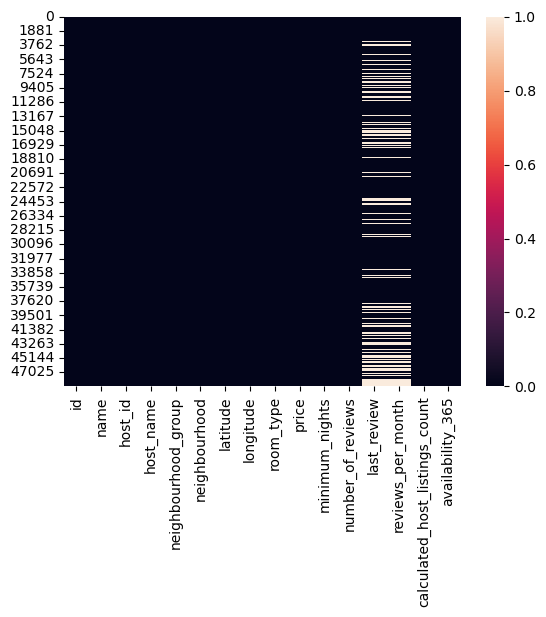

In [6]:
# Visualizing null values across the columns

cols = bnb_df.columns
sns.heatmap(bnb_df[cols].isnull())

In [7]:
# From the heatmap, we can see that the only 2 columns that contain NULL values are "last_review" and "reviews_per_month"
# We can see that there are more than 10,000 rows that contain NULL values, which is about a fifth of our entire dataset.
# This seems like too large of a portion of our dataset to just omit, so we will fill these values in

bnb_df["last_review"].isna().sum(), bnb_df["reviews_per_month"].isna().sum()

(10052, 10052)

In [8]:
# Filling in those NULL values

bnb_df["last_review"] = bnb_df["last_review"].fillna("None")
bnb_df["reviews_per_month"] = bnb_df["reviews_per_month"].fillna(0)

<AxesSubplot:>

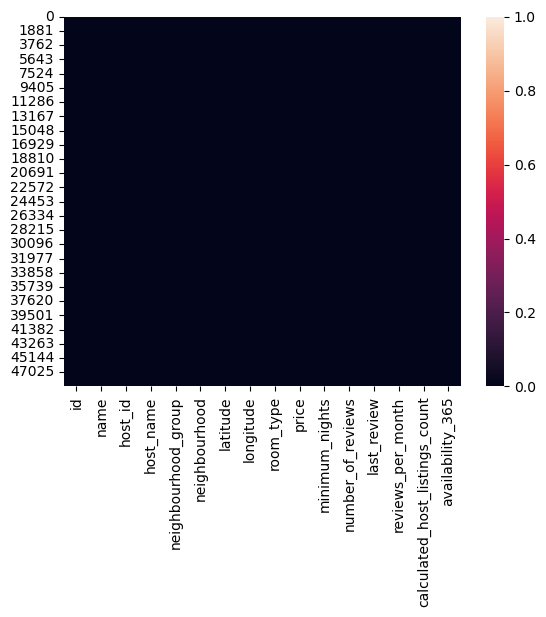

In [9]:
# Checking to make sure we filled in our NULL values

sns.heatmap(bnb_df[cols].isnull())

In [10]:
# Isolating just the year from the values in the "last_review" column

bnb_df.last_review = bnb_df.last_review.str[0:4]

In [11]:
bnb_df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,None,0.00,1,365


In [12]:
# Adding a new column that gives us the word/character count of each AirBnB name

# Explicitly changing the datatype of the "name" column into a string datatype
bnb_df["name"] = bnb_df["name"].values.astype(str)

# Storing the our new column's data into a variable
new_col = bnb_df["name"].apply(lambda x: len(x.split()))

# Inserting the new column with the proper data into a sensible index in our dataframe
bnb_df.insert(2, "name_word_count", new_col)

In [13]:
bnb_df.head(3)

,id,name,name_word_count,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,8,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018,0.21,6,365
1,2595,Skylit Midtown Castle,3,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,6,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,None,0.00,1,365


## Part 2: TMDB Movie API Parser

API link: https://developers.themoviedb.org/3/movies/get-movie-details

In [14]:
# For reference, my API key is: "d5513388af9c34711d6f31c01af4d7f0"

In [15]:
class MoviesAPI:
    
    def __init__(self, apikey):
        self.apikey = apikey
        # Creating an instance variable to use for other methods after initiating variable with ".get_data" method
        self.response = None 
        
    def get_data(self):
        og_response = requests.get(f"https://api.themoviedb.org/3/movie/now_playing?api_key={self.apikey}").text
        response = json.loads(og_response)
        self.response = response # Initiating instance variable and storing desired value 
        return response

    def get_dates(self):
        start = self.response['dates']['minimum']
        until = self.response['dates']['maximum']

        print(f"This API call contains blockbuster movies that released between {start} and {until}")

    def get_curr_movies(self):
        movies = []
        for i in range(len(self.response['results'])):
            movies.append(self.response['results'][i]['title'])

        return movies

    def get_movie_overview(self):
        overview = {}
        for i in range(len(self.response['results'])):
            overview[self.response['results'][i]['title']] = self.response['results'][i]['overview']

        return overview

    def create_csv(self):
        movie_file = open("moviesoutnow_data.csv", "w", newline="", encoding="utf-8")
        csv_writer = csv.writer(movie_file)
        csv_writer.writerow(["Title", "ID", "Release_Date", "Original_Language", "Overview"])

        for i in range(len(self.response['results'])):
            title = self.response['results'][i]['title']
            Id = self.response['results'][i]['id']
            rel_date = self.response['results'][i]['release_date']
            og_lang = self.response['results'][i]['original_language']
            overview = self.response['results'][i]['overview']

            csv_writer.writerow([title, Id, rel_date, og_lang, overview])

        movie_file.close

In [16]:
movies_out_now = MoviesAPI("d5513388af9c34711d6f31c01af4d7f0")

In [17]:
movies_out_now.get_data()

{'dates': {'maximum': '2023-03-27', 'minimum': '2023-02-07'},
 'page': 1,
 'results': [{'adult': False,
   'backdrop_path': '/wD2kUCX1Bb6oeIb2uz7kbdfLP6k.jpg',
   'genre_ids': [27, 53],
   'id': 980078,
   'original_language': 'en',
   'original_title': 'Winnie the Pooh: Blood and Honey',
   'overview': 'Christopher Robin is headed off to college and he has abandoned his old friends, Pooh and Piglet, which then leads to the duo embracing their inner monsters.',
   'popularity': 3371.856,
   'poster_path': '/quTBc7g5DcZX4oDOv2g1miXSHEM.jpg',
   'release_date': '2023-01-27',
   'title': 'Winnie the Pooh: Blood and Honey',
   'video': False,
   'vote_average': 5.9,
   'vote_count': 229},
  {'adult': False,
   'backdrop_path': '/a2tys4sD7xzVaogPntGsT1ypVoT.jpg',
   'genre_ids': [53, 35, 80, 27],
   'id': 804150,
   'original_language': 'en',
   'original_title': 'Cocaine Bear',
   'overview': 'Inspired by a true story, an oddball group of cops, criminals, tourists and teens converge in a G

In [18]:
movies_out_now.get_dates()

This API call contains blockbuster movies that released between 2023-02-07 and 2023-03-27


In [19]:
movies_out_now.get_curr_movies()

['Winnie the Pooh: Blood and Honey',
 'Cocaine Bear',
 'John Wick: Chapter 4',
 'Puss in Boots: The Last Wish',
 'Knock at the Cabin',
 'Black Panther: Wakanda Forever',
 'Plane',
 'Consecration',
 'Shazam! Fury of the Gods',
 'Die Hart',
 'Creed III',
 '13 Exorcisms',
 "The Magician's Elephant",
 'M3GAN',
 'Ant-Man and the Wasp: Quantumania',
 'Supercell',
 'Shotgun Wedding',
 'The Whale',
 'A Man Called Otto',
 '¡Que Viva México!']

In [20]:
movies_out_now.get_movie_overview()

{'Winnie the Pooh: Blood and Honey': 'Christopher Robin is headed off to college and he has abandoned his old friends, Pooh and Piglet, which then leads to the duo embracing their inner monsters.',
 'Cocaine Bear': 'Inspired by a true story, an oddball group of cops, criminals, tourists and teens converge in a Georgia forest where a 500-pound black bear goes on a murderous rampage after unintentionally ingesting cocaine.',
 'John Wick: Chapter 4': 'With the price on his head ever increasing, John Wick uncovers a path to defeating The High Table. But before he can earn his freedom, Wick must face off against a new enemy with powerful alliances across the globe and forces that turn old friends into foes.',
 'Puss in Boots: The Last Wish': 'Puss in Boots discovers that his passion for adventure has taken its toll: He has burned through eight of his nine lives, leaving him with only one life left. Puss sets out on an epic journey to find the mythical Last Wish and restore his nine lives.',

In [21]:
movies_out_now.create_csv()

In [22]:
data = pd.read_csv("moviesoutnow_data.csv")
data.head(5)

,Title,ID,Release_Date,Original_Language,Overview
0,Winnie the Pooh: Blood and Honey,980078,2023-01-27,en,Christopher Robin is headed off to college and...
1,Cocaine Bear,804150,2023-02-22,en,"Inspired by a true story, an oddball group of ..."
2,John Wick: Chapter 4,603692,2023-03-22,en,"With the price on his head ever increasing, Jo..."
3,Puss in Boots: The Last Wish,315162,2022-12-07,en,Puss in Boots discovers that his passion for a...
4,Knock at the Cabin,631842,2023-02-01,en,"While vacationing at a remote cabin, a young g..."
